<center>
            <h1>
   Literary rating prediction
            </h1>
    </center>
<center>
            by Alexander Potekhin
</center>
<center>
    Date: 2021/2022 
</center>

# EDA


Checking input data

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df = pd.read_csv("/Users/apotekhin/repositories/literary-predictor/src/feature-extractor/texts-features.csv")

In [218]:
df.head()

,title,author,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev
0,Человек для особых поручений,Антон Демченко,4.6,137,4.5,7,5.278017,11.145641,46.340415,115.793065,...,0.236054,70.594484,0.873375,49.917838,0.927142,352.845557,8.640586,58.848713,4.836289,92.652356
1,Закон военного счастья,Николай Басов,4.3,14,4.3,16,5.226791,11.951138,27.534179,111.716260,...,0.123009,77.086362,0.837317,54.508289,0.930091,297.188920,8.832776,59.340898,4.982132,91.536827
2,Потерянный бог,Милослав Князев,4.3,225,3.8,80,5.243787,9.582977,33.155987,84.489010,...,0.188745,52.931308,0.852089,37.428087,0.925512,339.327454,7.820838,61.186327,4.247623,96.890893
3,Звездный разведчик,Владимир Лосев,4.0,8,4.6,5,5.093497,10.929166,23.007612,94.761575,...,0.149964,50.151771,0.836784,35.462657,0.926137,262.425594,7.696635,65.129562,4.185448,97.112837
4,Путешествие из Петербурга в Москву (сборник),Александр Николаевич Радищев,4.2,9,3.7,59,5.376013,17.123849,17.553258,111.553041,...,0.253159,84.745904,0.881847,59.924404,0.939010,333.244111,12.121119,47.614338,7.325825,74.809435


In [219]:
df.tail()

,title,author,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev
1250,Самый странный нуб,Артем Каменистый,4.7,1131,4.3,592,5.140280,9.905964,22.441979,92.378221,...,0.234087,64.040632,0.870619,45.283565,0.933779,378.504993,7.569233,63.715126,4.080579,97.979732
1251,Последний паладин. Рождение (СИ),Евгений Сергеевич Скребцов,4.7,108,5.0,1,5.242286,9.833333,45.942475,71.244635,...,0.218202,57.185631,0.863312,40.436347,0.932954,380.992053,7.988958,60.562139,4.367261,96.038575
1252,Заханд. Метисация (СИ),Алексей Владимирович Андриенко,4.7,24,3.4,3,5.344161,11.183071,22.121183,83.331716,...,0.170604,77.928286,0.855621,55.103620,0.943940,434.738343,8.778357,58.027793,4.932001,91.990129
1253,Чингисхан. Батый,Василий Ян,4.6,254,4.5,1311,5.370074,12.637908,32.702139,86.168388,...,0.208966,73.537991,0.866495,51.999212,0.929291,383.161188,9.713568,54.599804,5.597852,87.243706
1254,Карантин класса «Т»,Андрей Буревой,4.7,46,4.3,27,5.171288,12.108856,18.834634,85.999822,...,0.336348,54.792711,0.893032,38.744297,0.931659,349.941041,8.798521,59.963030,4.961481,91.652532


In [220]:
df[(df['litres mark']) == 'None']

,title,author,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev
34,Аэрос. Оцифрованный мир (1-2),Александр Сергеевич Пантелеев,None,None,4.0,3,5.161016,7.535744,18.187514,60.567049,...,0.243194,69.209389,0.874899,48.938429,0.936948,328.389022,6.413565,66.563801,3.247323,104.007482
524,Охота на ликвидатора,Сергей Раткевич,None,None,4.3,9,5.129463,8.839165,18.870962,84.754954,...,0.171344,54.468541,0.846913,38.515075,0.931212,231.040037,6.891099,66.135023,3.597266,101.429127
587,Кто виноват_ (сборник),Александр Иванович Герцен,None,None,4.0,174,5.364522,20.014117,54.581126,117.273025,...,0.214273,81.966643,0.870477,57.959169,0.935318,322.173567,13.542731,43.948600,8.349615,67.413484
671,Книга народной мудрости,Иван Михайлович Снегирев,None,None,4.0,2,4.497183,6.011693,6.003006,86.978247,...,0.252023,73.853159,0.878683,52.222069,0.912864,90.046401,3.074271,87.053308,0.931910,119.989247
742,Нереалия. Книга первая Битва за Смоленск (СИ),Сергей Александрович Матвеев,None,None,3.0,1,5.166993,7.914390,24.066227,87.348090,...,0.139525,36.758108,0.823326,25.991907,0.930156,303.995010,6.574924,66.275815,3.364491,103.153012
1008,Инспектор вселенных,Игорь Сергеевич Фурсов,None,None,3.0,1,5.137968,9.110050,18.640035,79.256097,...,0.191767,62.480364,0.857295,44.180289,0.932099,308.399132,7.015509,65.863758,3.687234,100.776083


Getting rid of 'None' cells

In [221]:
df.loc[(df['litres mark'] == 'None', 'litres mark')] = 0
df.loc[(df['litres votes'] == 'None', 'litres votes')] = 0
df.loc[(df['livelib mark'] == 'None', 'livelib mark')] = 0
df.loc[(df['livelib votes'] == 'None', 'livelib votes')] = 0

In [222]:
df[df['livelib votes'] == 'None']

,title,author,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev


Calculating weighted mean as target 

In [223]:
df[['litres mark', 'litres votes', 'livelib mark', 'livelib votes']] = df[['litres mark', 'litres votes', 'livelib mark', 'livelib votes']].apply(pd.to_numeric)

In [224]:
# df.loc[df['litres votes'] >=  df['livelib votes'], "max_votes"] = df['litres votes']
# df.loc[df['litres votes'] < df['livelib votes'], "max_votes"] = df['livelib votes']
# df

In [225]:
df.columns

Index(['title', 'author', 'litres mark', 'litres votes', 'livelib mark',
       'livelib votes', 'avg_word_len', 'avg_sent_len', 'avg_words_per_par',
       'comma_freq', 'colon_freq', 'dash_freq', 'A1 voc', 'A2 voc', 'B1 voc',
       'B2 voc', 'C1 voc', 'C2 voc', 'unknown voc', 'TTR', 'TTR-root',
       'TTR-log', 'TTR-corrected', 'TTR-hdd', 'TTR-mtld', 'FKD-oborneva',
       'FRE-oborneva', 'FKD-soloviev', 'FRE-soloviev'],
      dtype='object')

In [226]:
df.shape

(1255, 29)

In [227]:
df.dtypes

title                 object
author                object
litres mark          float64
litres votes           int64
livelib mark         float64
livelib votes          int64
avg_word_len         float64
avg_sent_len         float64
avg_words_per_par    float64
comma_freq           float64
colon_freq           float64
dash_freq            float64
A1 voc               float64
A2 voc               float64
B1 voc               float64
B2 voc               float64
C1 voc               float64
C2 voc               float64
unknown voc          float64
TTR                  float64
TTR-root             float64
TTR-log              float64
TTR-corrected        float64
TTR-hdd              float64
TTR-mtld             float64
FKD-oborneva         float64
FRE-oborneva         float64
FKD-soloviev         float64
FRE-soloviev         float64
dtype: object

In [228]:
df.dtypes.value_counts()

float64    25
object      2
int64       2
dtype: int64

In [229]:
df.isnull().sum()

title                0
author               0
litres mark          0
litres votes         0
livelib mark         0
livelib votes        0
avg_word_len         0
avg_sent_len         0
avg_words_per_par    0
comma_freq           0
colon_freq           0
dash_freq            0
A1 voc               0
A2 voc               0
B1 voc               0
B2 voc               0
C1 voc               0
C2 voc               0
unknown voc          0
TTR                  0
TTR-root             0
TTR-log              0
TTR-corrected        0
TTR-hdd              0
TTR-mtld             0
FKD-oborneva         0
FRE-oborneva         0
FKD-soloviev         0
FRE-soloviev         0
dtype: int64

In [230]:
df[df.isnull().any(axis=1)]

,title,author,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev


In [231]:
df.describe()

,litres mark,litres votes,livelib mark,livelib votes,avg_word_len,avg_sent_len,avg_words_per_par,comma_freq,colon_freq,dash_freq,...,TTR,TTR-root,TTR-log,TTR-corrected,TTR-hdd,TTR-mtld,FKD-oborneva,FRE-oborneva,FKD-soloviev,FRE-soloviev
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,4.374741,354.655777,3.200000,726.537849,5.258333,11.279764,36.006851,87.045192,3.087793,10.021593,...,0.222573,63.933539,0.865640,45.207839,0.931256,347.231866,8.685048,58.847358,4.869161,92.407778
std,0.560438,1088.088945,1.749263,3212.781425,0.256885,3.251171,38.051053,15.328283,2.744431,15.870476,...,0.058000,11.816271,0.015672,8.355366,0.027745,113.686096,1.989062,8.167179,1.414545,10.073325
min,0.000000,0.000000,0.000000,0.000000,3.310676,5.728500,3.814495,30.488375,0.000000,0.000000,...,0.062624,5.589566,0.795284,3.952420,0.000000,82.386667,3.074271,-18.447796,0.931910,-45.122123
25%,4.200000,19.000000,3.000000,1.000000,5.101844,9.298761,23.137427,78.056867,1.040654,0.000000,...,0.189786,56.339378,0.856432,39.837956,0.925910,267.644090,7.453928,54.743611,3.998496,88.013082
50%,4.500000,77.000000,4.000000,13.000000,5.245610,10.676143,29.269359,87.527712,2.365238,0.003592,...,0.217732,63.182406,0.865566,44.676707,0.932759,328.005887,8.417368,59.866921,4.684879,93.693074
75%,4.700000,267.000000,4.400000,114.000000,5.405455,12.638962,37.816846,96.472739,4.329689,20.614391,...,0.247254,70.344979,0.874479,49.741412,0.938037,407.728745,9.586266,63.693783,5.505542,98.581814
max,5.000000,27084.000000,5.000000,58049.000000,6.608696,60.665574,678.964286,133.734664,26.197500,75.471698,...,0.934783,118.289394,0.982385,83.643232,0.959897,1083.852437,35.314565,102.911781,23.981754,119.989247


<AxesSubplot:>

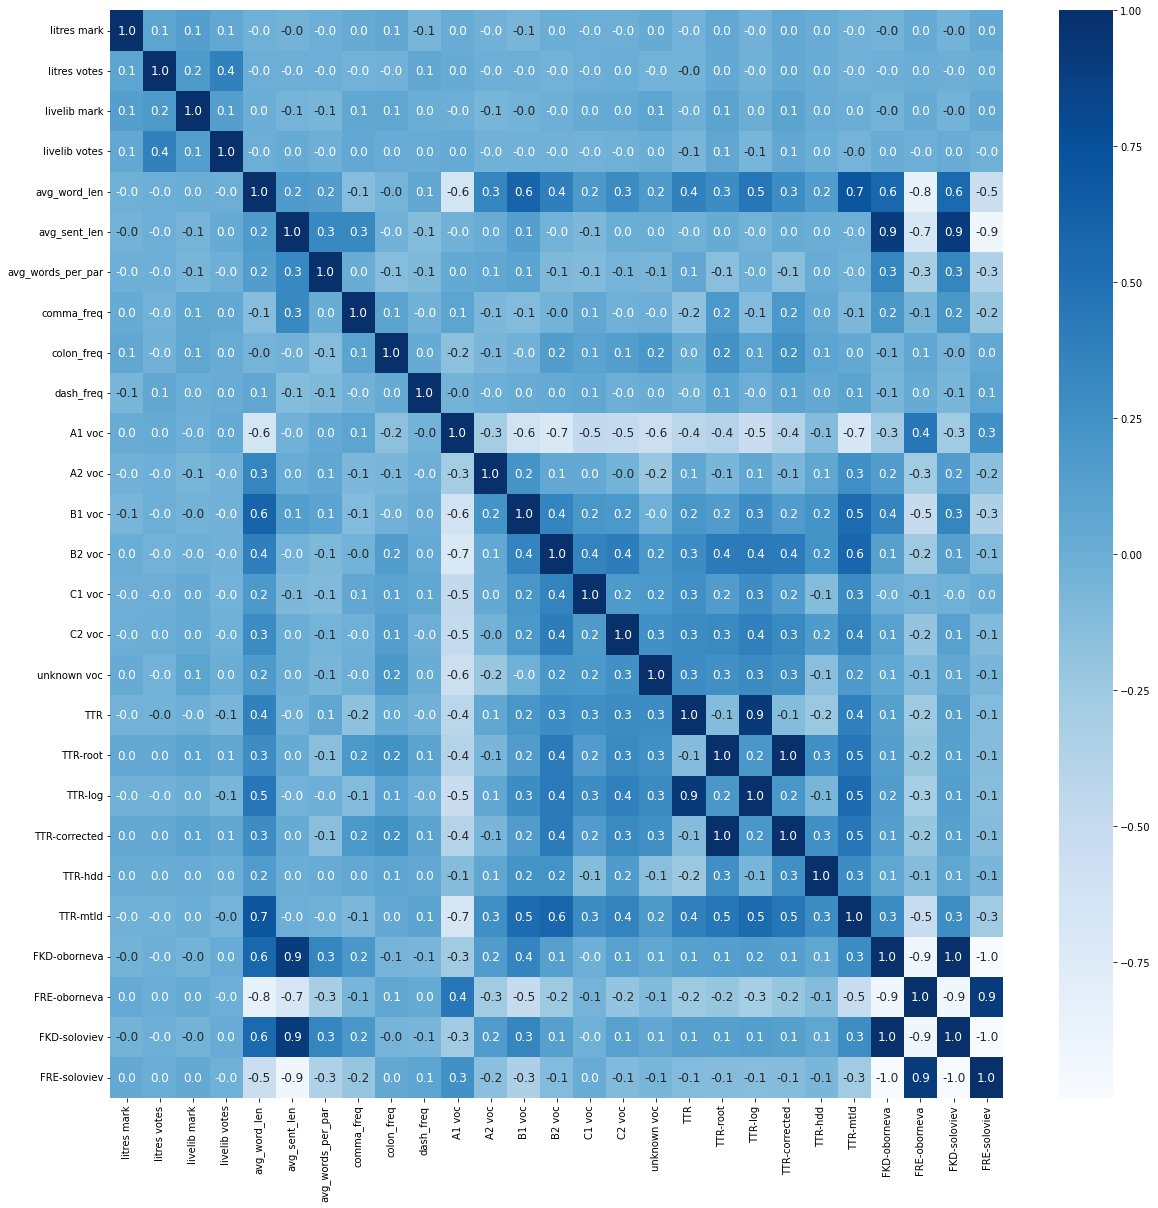

In [232]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Blues')

The distribution of data and features correlation leaves much to be desired

In [233]:
X = df.drop(columns=['title', 'author', 'litres mark', 'litres votes', 'livelib mark', 'livelib votes'])
y = (df['litres mark'] * df['litres votes'] + df['livelib mark'] * df['livelib votes']) / (df['litres votes'] + df['livelib votes'])

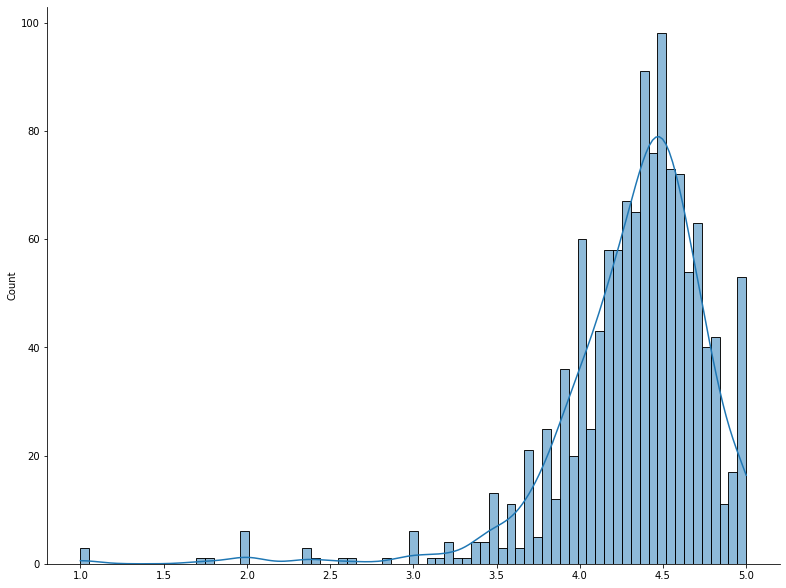

In [234]:
sns.displot(x=y, bins=75,  kde=True, height=8.27, aspect=12/9)


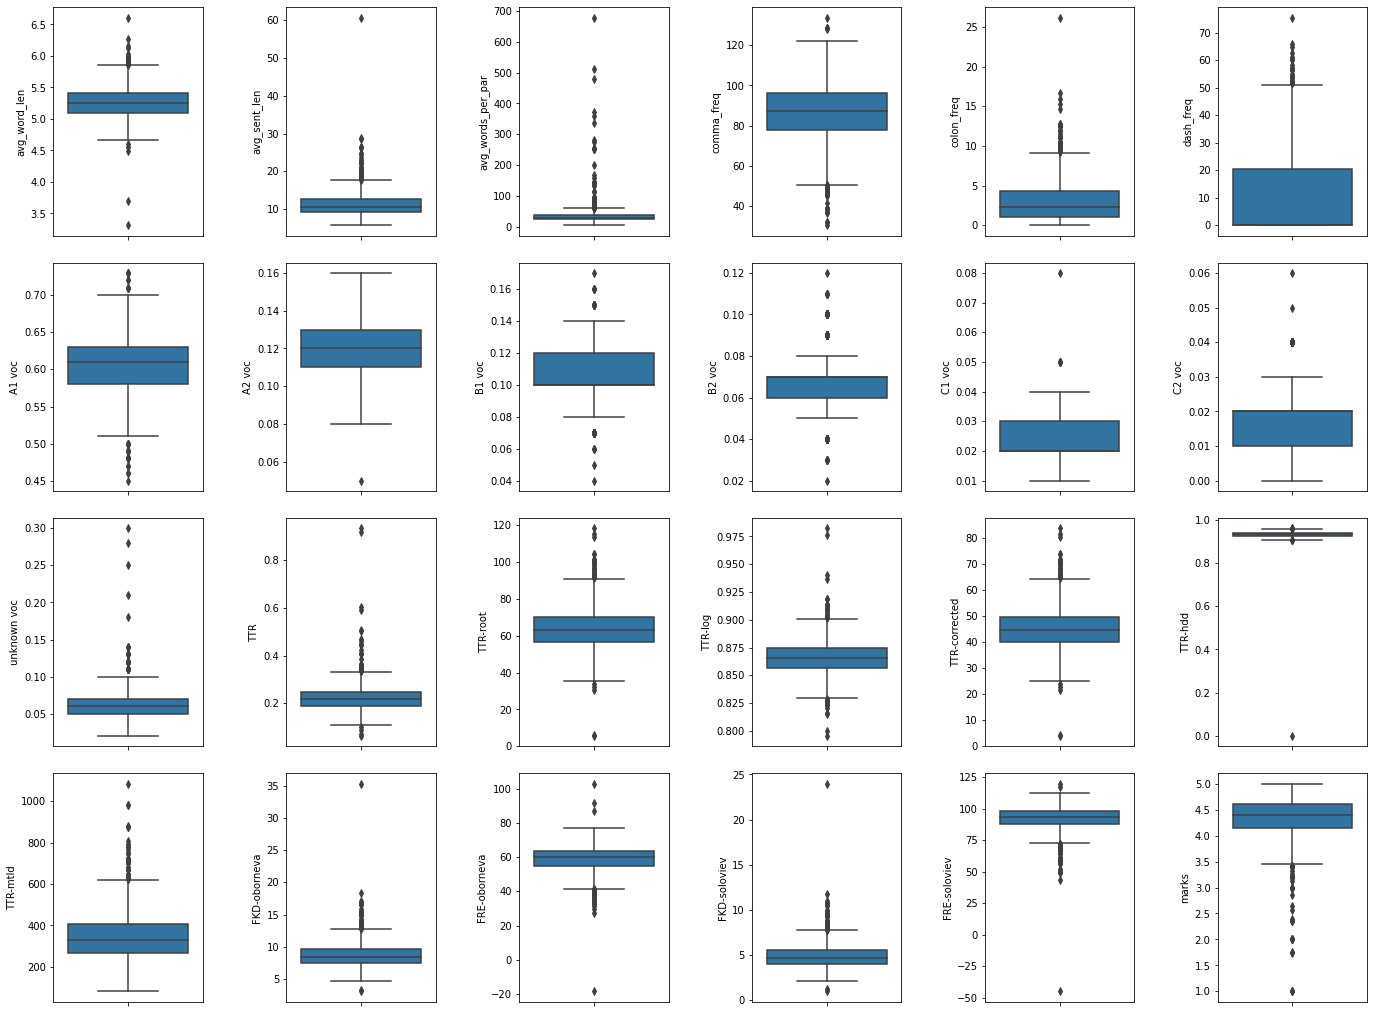

In [259]:
fig, axs = plt.subplots(ncols=6, nrows=4, figsize=(20, 15))
index = 0
axs = axs.flatten()
for i,j in X.items():
    sns.boxplot(y=i, data=X, ax=axs[index])
    index += 1
sns.boxplot(y=y).set_ylabel('marks')
plt.tight_layout(pad=4, w_pad=4, h_pad=2)


# Prediction of rating

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

### Linear Regression

In [238]:
lr = LinearRegression()


lr.fit(X_train, y_train)

LinearRegression()

In [239]:
print('R^2:', metrics.r2_score(y_test, lr.predict(X_test)))
print('MAE:',metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE:',metrics.mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

R^2: -0.14345092404681115
MAE: 0.35425543466956033
MSE: 0.29158820122175244
RMSE: 0.5399890750948138


,Attribute,Coefficients
0,avg_word_len,0.390156
1,avg_sent_len,0.014232
2,avg_words_per_par,0.000228
3,comma_freq,0.001145
4,colon_freq,0.002734
5,dash_freq,-0.002084
6,A1 voc,0.70087
7,A2 voc,0.047797
8,B1 voc,-0.852638
9,B2 voc,0.101387


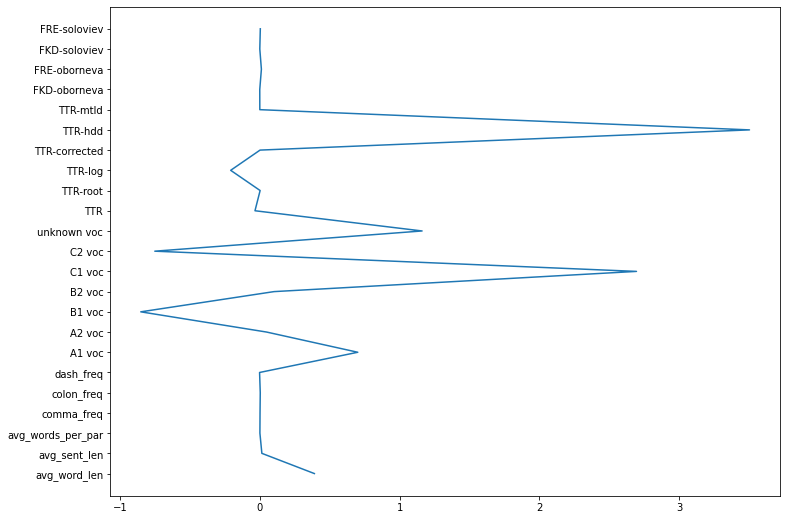

In [240]:
coef = pd.DataFrame([X_train.columns,lr.coef_]).T
coef = coef.rename(columns={0: 'Attribute', 1: 'Coefficients'})
plt.figure(figsize=(12,9))
plt.plot(lr.coef_, X_train.columns)
coef

### Random forest regression

In [241]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [242]:
print('R^2:', metrics.r2_score(y_test, rfr.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(y_test, rfr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rfr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))))

R^2: -0.03313251626967628
MAE: 0.3474485459152812
MSE: 0.26345621461096047
RMSE: 0.513279859931169


### Gradient boosting regression

In [243]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()


cbr.fit(X_train, y_train)

Learning rate set to 0.041359
0:	learn: 0.4505150	total: 6.73ms	remaining: 6.73s
1:	learn: 0.4491458	total: 8.12ms	remaining: 4.05s
2:	learn: 0.4475749	total: 9.29ms	remaining: 3.09s
3:	learn: 0.4460276	total: 10.5ms	remaining: 2.61s
4:	learn: 0.4449849	total: 11.7ms	remaining: 2.32s
5:	learn: 0.4438015	total: 12.8ms	remaining: 2.13s
6:	learn: 0.4426464	total: 14.3ms	remaining: 2.02s
7:	learn: 0.4418378	total: 15.6ms	remaining: 1.94s
8:	learn: 0.4411007	total: 16.8ms	remaining: 1.85s
9:	learn: 0.4404513	total: 18ms	remaining: 1.78s
10:	learn: 0.4396609	total: 19.5ms	remaining: 1.75s
11:	learn: 0.4391256	total: 21.4ms	remaining: 1.76s
12:	learn: 0.4379612	total: 24.4ms	remaining: 1.85s
13:	learn: 0.4369667	total: 25.5ms	remaining: 1.8s
14:	learn: 0.4363766	total: 27ms	remaining: 1.77s
15:	learn: 0.4350961	total: 28.6ms	remaining: 1.76s
16:	learn: 0.4341301	total: 29.8ms	remaining: 1.73s
17:	learn: 0.4336758	total: 31.1ms	remaining: 1.7s
18:	learn: 0.4327146	total: 32.2ms	remaining: 1.66

In [244]:
print('R^2:', metrics.r2_score(y_test, cbr.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(y_test, cbr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, cbr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cbr.predict(X_test)))) 

R^2: 0.03392689610484634
MAE: 0.3343249647934204
MSE: 0.24635558263974153
RMSE: 0.4963422031620337


### Scaling features

In [245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.15, random_state=42)

In [247]:
rfr_sc = RandomForestRegressor()
rfr_sc.fit(X_train, y_train)

RandomForestRegressor()

In [248]:
print('R^2:', metrics.r2_score(y_test, rfr_sc.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(y_test, rfr_sc.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rfr_sc.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_sc.predict(X_test))))

R^2: 0.019393896644392283
MAE: 0.3432987689987518
MSE: 0.2500616019204229
RMSE: 0.5000615981260937


In [249]:
print(rfr_sc.feature_importances_)
print(rfr.feature_importances_)

[0.05678331 0.05798451 0.0802822  0.09312079 0.0640208  0.06443492
 0.02914011 0.02028301 0.03394517 0.02340109 0.01360639 0.01040105
 0.02554758 0.04471364 0.02701065 0.04833188 0.03145318 0.08161756
 0.06340819 0.02358751 0.05140011 0.02206932 0.03345702]
[0.05986543 0.05688586 0.07987443 0.09743879 0.06029134 0.05801589
 0.03092377 0.0202743  0.03521182 0.02663451 0.0129669  0.01152165
 0.02653576 0.04547647 0.02820519 0.04900323 0.03186551 0.08376091
 0.06632637 0.02595476 0.04230081 0.02179845 0.02886786]


As can be seen from R^2 results, models poorly predicting target variable. 

## Classification approach

In [250]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



In [251]:
y1 = pd.qcut(y, q=[0, .5, 1], labels=[0, 1])
y1

0       1
1       0
2       0
3       0
4       0
       ..
1250    1
1251    1
1252    1
1253    1
1254    1
Length: 1255, dtype: category
Categories (2, int64): [0 < 1]

In [252]:
y1.value_counts()

0    636
1    619
dtype: int64

In [253]:
rfc = RandomForestClassifier()
rfc2 = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto', n_estimators=500, random_state=42)
cfc = CatBoostClassifier()
cfc2 = CatBoostClassifier(depth=5, iterations=100, l2_leaf_reg=1, learning_rate=0.03, random_state=42)
lgr = LogisticRegression()
lgr2 = LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l2', solver='saga')
knn = KNeighborsClassifier(n_neighbors=12)


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}


params = {
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.1, 0.2, 0.3],
    'iterations': [70, 100, 500, 1000], 
    'l2_leaf_reg': [3,1,5,10,100]
}

params_grid = {    
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

# criterion=entropy, max_depth=7, max_features='auto', n_estimators=500
# depth=5, iterations=100, l2_leaf_reg=1, learning_rate=0.03
# C=0.615848211066026, max_iter=1000, penalty='l2', solver='saga'
# gscv = GridSearchCV (estimator = lgr2, param_grid = params_grid, cv = 5)




In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y1, test_size = 0.15, random_state=42)

In [255]:
rfc.fit(X_train, y_train)
rfc2.fit(X_train, y_train)
cfc.fit(X_train, y_train)
lgr.fit(X_train, y_train)
knn.fit(X_train, y_train)
cfc2.fit(X_train, y_train)
lgr2.fit(X_train, y_train)

# gscv.fit(X_train, y_train)

Learning rate set to 0.010587
0:	learn: 0.6927153	total: 2.53ms	remaining: 2.53s
1:	learn: 0.6922655	total: 4.02ms	remaining: 2s
2:	learn: 0.6919759	total: 5.36ms	remaining: 1.78s
3:	learn: 0.6914237	total: 7.34ms	remaining: 1.83s
4:	learn: 0.6907163	total: 8.42ms	remaining: 1.68s
5:	learn: 0.6900016	total: 9.71ms	remaining: 1.61s
6:	learn: 0.6892679	total: 10.9ms	remaining: 1.54s
7:	learn: 0.6889533	total: 11.9ms	remaining: 1.47s
8:	learn: 0.6883203	total: 13.1ms	remaining: 1.44s
9:	learn: 0.6876953	total: 14.1ms	remaining: 1.4s
10:	learn: 0.6869828	total: 15.2ms	remaining: 1.36s
11:	learn: 0.6863607	total: 16.3ms	remaining: 1.34s
12:	learn: 0.6857795	total: 17.6ms	remaining: 1.34s
13:	learn: 0.6849529	total: 19.2ms	remaining: 1.35s
14:	learn: 0.6842203	total: 20.5ms	remaining: 1.34s
15:	learn: 0.6836015	total: 21.8ms	remaining: 1.34s
16:	learn: 0.6830942	total: 23.3ms	remaining: 1.35s
17:	learn: 0.6824241	total: 24.7ms	remaining: 1.35s
18:	learn: 0.6820687	total: 26.1ms	remaining: 1.

LogisticRegression(C=0.615848211066026, max_iter=500, solver='saga')

In [256]:

print("train sample\n")

print("rfc ", roc_auc_score(y_train, rfc.predict(X_train)))
print("rfc2 ", roc_auc_score(y_train, rfc.predict(X_train)))
print("cfc ", roc_auc_score(y_train, cfc.predict(X_train)))
print("cfc2 ", roc_auc_score(y_train, cfc.predict(X_train)))
print("lgr ", roc_auc_score(y_train, lgr.predict(X_train)))
print("lgr2 ", roc_auc_score(y_train, lgr2.predict(X_train)))
print("knn ", roc_auc_score(y_train, knn.predict(X_train)))

print("\ntest sample\n")

print("rfc ", roc_auc_score(y_test, rfc.predict(X_test)))
print("rfc2 ", roc_auc_score(y_test, rfc2.predict(X_test)))
print("cfc ", roc_auc_score(y_test, cfc.predict(X_test)))
print("cfc2 ", roc_auc_score(y_test, cfc2.predict(X_test)))
print("lgr ", roc_auc_score(y_test, lgr.predict(X_test)))
print("lgr2 ", roc_auc_score(y_test, lgr2.predict(X_test)))
print("knn ", roc_auc_score(y_test, knn.predict(X_test)))



# print(gscv.best_params_)
# print(gscv.best_score_)

train sample

rfc  1.0
rfc2  1.0
cfc  0.9812366227329052
cfc2  0.9812366227329052
lgr  0.5484855525515377
lgr2  0.5456622451278585
knn  0.6265771093838008

test sample

rfc  0.5771604938271605
rfc2  0.6141975308641975
cfc  0.5493827160493827
cfc2  0.6141975308641976
lgr  0.6172839506172839
lgr2  0.632716049382716
knn  0.5925925925925927


In [257]:
print("rfc2 ", classification_report(y_test, rfc2.predict(X_test)))
print("cfc2 ", classification_report(y_test, cfc2.predict(X_test)))
print("lgr2 ", classification_report(y_test, lgr2.predict(X_test)))

rfc2                precision    recall  f1-score   support

           0       0.70      0.54      0.61       108
           1       0.53      0.69      0.60        81

    accuracy                           0.60       189
   macro avg       0.61      0.61      0.60       189
weighted avg       0.63      0.60      0.60       189

cfc2                precision    recall  f1-score   support

           0       0.71      0.50      0.59       108
           1       0.52      0.73      0.61        81

    accuracy                           0.60       189
   macro avg       0.62      0.61      0.60       189
weighted avg       0.63      0.60      0.60       189

lgr2                precision    recall  f1-score   support

           0       0.71      0.57      0.64       108
           1       0.55      0.69      0.61        81

    accuracy                           0.62       189
   macro avg       0.63      0.63      0.62       189
weighted avg       0.64      0.62      0.63       189

